In [1]:
import pandas as pd

df_rela = pd.read_csv('merged_data.csv')
print(df_rela.head())

       LCLid        date     KWH  cloud_cover  sunshine  global_radiation  \
0  MAC000002  2012-10-12   7.098          5.0       6.4             106.0   
1  MAC000002  2012-10-13  11.087          4.0       4.1              85.0   
2  MAC000002  2012-10-14  13.223          1.0       7.7             113.0   
3  MAC000002  2012-10-15  10.257          6.0       0.6              44.0   
4  MAC000002  2012-10-16   9.769          4.0       7.3             107.0   

   max_temp  mean_temp  min_temp  precipitation  pressure  snow_depth  
0      13.5       12.3       9.7            0.0  100580.0         0.0  
1      12.9        9.6       5.6            0.8  100480.0         0.0  
2      14.2        7.4       1.9            0.0  100270.0         0.0  
3      15.9        8.6       2.9            1.4  100240.0         0.0  
4      17.5       12.1       8.3           12.0  100090.0         0.0  


In [2]:
from sklearn.preprocessing import StandardScaler
# Delete rows that contain null values
df_rela = df_rela.dropna()


In [3]:
# Convert to date type
df_rela['date'] = pd.to_datetime(df_rela['date'])

# Extract date features
df_rela['month'] = df_rela['date'].dt.month
df_rela['day'] = df_rela['date'].dt.day
df_rela['day_of_week'] = df_rela['date'].dt.dayofweek
df_rela['week_of_year'] = df_rela['date'].dt.isocalendar().week

In [4]:
# Seasonal function
def get_season(month):
    if month in [3, 4, 5]:  # sp：3, 4, 5
        return 0
    elif month in [6, 7, 8]:  # summ：6, 7, 8
        return 1
    elif month in [9, 10, 11]:  # aut：9, 10, 11
        return 2
    else:  # win：12, 1, 2
        return 3
    
df_rela['season'] = df_rela['month'].apply(get_season)

df_rela = df_rela[['date', 'LCLid', 'season', 'KWH', 'cloud_cover', 'sunshine', 'global_radiation',
                   'max_temp', 'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth', 'month' , 'day' , 'day_of_week' , 'week_of_year']]

print(df_rela)

              date      LCLid  season     KWH  cloud_cover  sunshine  \
0       2012-10-12  MAC000002       2   7.098          5.0       6.4   
1       2012-10-13  MAC000002       2  11.087          4.0       4.1   
2       2012-10-14  MAC000002       2  13.223          1.0       7.7   
3       2012-10-15  MAC000002       2  10.257          6.0       0.6   
4       2012-10-16  MAC000002       2   9.769          4.0       7.3   
...            ...        ...     ...     ...          ...       ...   
3510428 2014-02-24  MAC005567       3   4.107          4.0       4.4   
3510429 2014-02-25  MAC005567       3   5.762          5.0       2.0   
3510430 2014-02-26  MAC005567       3   5.066          1.0       7.7   
3510431 2014-02-27  MAC005567       3   3.217          4.0       4.9   
3510432 2014-02-28  MAC005567       3   0.366          7.0       1.0   

         global_radiation  max_temp  mean_temp  min_temp  precipitation  \
0                   106.0      13.5       12.3       9.7    

In [5]:
# z-score
columns_to_scale = ['KWH', 'cloud_cover', 'sunshine', 'global_radiation', 
                    'max_temp', 'mean_temp', 'min_temp', 'precipitation', 
                    'pressure', 'snow_depth','season','month' , 'day' , 'day_of_week' , 'week_of_year']

# initialize StandardScaler
scaler = StandardScaler()
df_rela[columns_to_scale] = scaler.fit_transform(df_rela[columns_to_scale])

print(df_rela)

              date      LCLid    season       KWH  cloud_cover  sunshine  \
0       2012-10-12  MAC000002  0.324801 -0.331893     0.120977  0.644589   
1       2012-10-13  MAC000002  0.324801  0.104816    -0.309433  0.048299   
2       2012-10-14  MAC000002  0.324801  0.338662    -1.600664  0.981622   
3       2012-10-15  MAC000002  0.324801  0.013949     0.551387 -0.859097   
4       2012-10-16  MAC000002  0.324801 -0.039476    -0.309433  0.877919   
...            ...        ...       ...       ...          ...       ...   
3510428 2014-02-24  MAC005567  1.247355 -0.659343    -0.309433  0.126076   
3510429 2014-02-25  MAC005567  1.247355 -0.478156     0.120977 -0.496139   
3510430 2014-02-26  MAC005567  1.247355 -0.554353    -1.600664  0.981622   
3510431 2014-02-27  MAC005567  1.247355 -0.756779    -0.309433  0.255704   
3510432 2014-02-28  MAC005567  1.247355 -1.068902     0.981798 -0.755395   

         global_radiation  max_temp  mean_temp  min_temp  precipitation  \
0           

In [6]:
import numpy as np

# Delete non-numeric column
df_rela_numeric = df_rela.drop(columns=['LCLid', 'date'])

pearson_corr_kwh = df_rela_numeric.corr()['KWH']
spearman_corr_kwh = df_rela_numeric.corr(method='spearman')['KWH']
combined_corr = (pearson_corr_kwh.abs() + spearman_corr_kwh.abs() ) /2

print(combined_corr)

threshold = 0.1
selected_features = combined_corr[combined_corr > threshold].index.tolist()

print('selected features based on combined correlation: \n', selected_features)

season              0.102789
KWH                 1.000000
cloud_cover         0.060001
sunshine            0.091417
global_radiation    0.145463
max_temp            0.164629
mean_temp           0.168483
min_temp            0.157012
precipitation       0.032972
pressure            0.037990
snow_depth          0.034984
month               0.026115
day                 0.004711
day_of_week         0.017292
week_of_year        0.029088
Name: KWH, dtype: float64
selected features based on combined correlation: 
 ['season', 'KWH', 'global_radiation', 'max_temp', 'mean_temp', 'min_temp']


In [7]:
#  YYYYMMDD
df_rela['date'] = df_rela['date'].dt.strftime('%Y%m%d').astype(int)
print(df_rela)

df_rela = df_rela.sample(frac=0.05, random_state=42)  # Too much data to run through, shrink the data set

             date      LCLid    season       KWH  cloud_cover  sunshine  \
0        20121012  MAC000002  0.324801 -0.331893     0.120977  0.644589   
1        20121013  MAC000002  0.324801  0.104816    -0.309433  0.048299   
2        20121014  MAC000002  0.324801  0.338662    -1.600664  0.981622   
3        20121015  MAC000002  0.324801  0.013949     0.551387 -0.859097   
4        20121016  MAC000002  0.324801 -0.039476    -0.309433  0.877919   
...           ...        ...       ...       ...          ...       ...   
3510428  20140224  MAC005567  1.247355 -0.659343    -0.309433  0.126076   
3510429  20140225  MAC005567  1.247355 -0.478156     0.120977 -0.496139   
3510430  20140226  MAC005567  1.247355 -0.554353    -1.600664  0.981622   
3510431  20140227  MAC005567  1.247355 -0.756779    -0.309433  0.255704   
3510432  20140228  MAC005567  1.247355 -1.068902     0.981798 -0.755395   

         global_radiation  max_temp  mean_temp  min_temp  precipitation  \
0               -0.03594

In [8]:
from sklearn.model_selection import train_test_split

X = df_rela[['date','global_radiation','max_temp','mean_temp','min_temp','season']]  
y = df_rela[['KWH']]  


X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)


print("Size of the training set: ", X_train.shape)
print("Size of the validation set: ", X_val.shape)
print("Size of the testing set: ", X_test.shape)


train_data = pd.concat([X_train, y_train], axis=1)
val_data = pd.concat([X_val, y_val], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

train_data.to_csv('train_rela.csv', index=False)
val_data.to_csv('val_rela.csv', index=False)
test_data.to_csv('test_rela.csv', index=False)


train_df = pd.read_csv('train_rela.csv')
val_df = pd.read_csv('val_rela.csv')
test_df = pd.read_csv('test_rela.csv')


print('Training set: ')
print(train_df.head())
print('\nValidation set:')
print(val_df.head())
print('\nTest set:')
print(test_df.head())

Size of the training set:  (105286, 6)
Size of the validation set:  (35096, 6)
Size of the testing set:  (35096, 6)
Training set: 
       date  global_radiation  max_temp  mean_temp  min_temp    season  \
0  20140118         -0.964176 -0.936402  -0.485069 -0.255725  1.247355   
1  20130118         -1.091807 -2.050688  -2.015952 -1.740358  1.247355   
2  20120626          0.961901  1.233524   1.164882  1.191322 -0.597754   
3  20130515          0.138097  0.280516  -0.161883 -0.255725 -1.520309   
4  20130704          0.985107  1.658713   1.266941  0.947015 -0.597754   

        KWH  
0 -0.598911  
1  1.994852  
2  0.043727  
3 -1.030147  
4  0.504522  

Validation set:
       date  global_radiation  max_temp  mean_temp  min_temp    season  \
0  20131116         -0.569678 -0.775123  -1.029383 -1.345709  0.324801   
1  20130805          0.265729  1.130893   1.539098  1.736314 -0.597754   
2  20121014          0.045274 -0.115349  -0.655167 -1.045024  0.324801   
3  20130315         -0.6392

2.Baseline model - Moving average

In [9]:

def moving_average(data, window_size):
    averages = []
    for i in range(len(data) - window_size + 1):
        window = data[i:i + window_size]
        average = np.mean(window)
        averages.append(average)
    return np.array(averages)


window_size = 7


X_train_ma = np.zeros((X_train.shape[0] - window_size + 1, X_train.shape[1]))
for i in range(X_train.shape[1]):
    X_train_ma[:, i] = moving_average(X_train.iloc[:, i], window_size)


y_train_ma = moving_average(y_train['KWH'].values, window_size)

class MovingAverageModel:
    def __init__(self):
        self.window_size = None
        self.coefficients = None

    def fit(self, X, y):
        self.window_size = X.shape[1]
        self.coefficients = np.linalg.lstsq(X, y, rcond=None)[0]

    def predict(self, X):
        return np.dot(X, self.coefficients)

In [10]:

model_kwh = MovingAverageModel()
model_kwh.fit(X_train_ma, y_train_ma)


X_val_ma = np.zeros((X_val.shape[0] - window_size + 1, X_val.shape[1]))
for i in range(X_val.shape[1]):
    X_val_ma[:, i] = moving_average(X_val.iloc[:, i], window_size)

y_val_ma = model_kwh.predict(X_val_ma)


X_test_ma = np.zeros((X_test.shape[0] - window_size + 1, X_test.shape[1]))
for i in range(X_test.shape[1]):
    X_test_ma[:, i] = moving_average(X_test.iloc[:, i], window_size)

y_test_ma = model_kwh.predict(X_test_ma)


In [11]:
# evaluate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# RMSE
mse_ma = mean_squared_error(y_test['KWH'].values[window_size - 1:], y_test_ma)


# MSE
mse_ma = mean_squared_error(y_test['KWH'].values[window_size - 1:], y_test_ma)

# MAE
mae_ma = mean_absolute_error(y_test['KWH'].values[window_size - 1:], y_test_ma)

# R2
r2_ma = r2_score(y_test['KWH'].values[window_size - 1:], y_test_ma)

print("RMSE of 'max_temp' in test set: {:.2f}".format(np.sqrt(mse_ma)))

print("MSE of 'max_temp' in test set: {:.2f}".format(mse_ma))

print("MAE of 'max_temp' in test set: {:.2f}".format(mae_ma))

print("R² of 'max_temp' in test set: {:.2f}".format(r2_ma))


RMSE of 'max_temp' in test set: 1.00
MSE of 'max_temp' in test set: 1.01
MAE of 'max_temp' in test set: 0.64
R² of 'max_temp' in test set: 0.00


3.LSTM

In [12]:

train_df_weather = train_df.sort_values('date')
val_df_weather = val_df.sort_values('date')
test_df_weather = test_df.sort_values('date')

features = ['global_radiation','max_temp','mean_temp','min_temp','season']
target = ['KWH']


train_X_rnn = train_df[features].values
train_y_rnn = train_df[target].values

val_X_rnn = val_df[features].values
val_y_rnn = val_df[target].values

test_X_rnn = test_df[features].values
test_y_rnn = test_df[target].values


def create_time_series(X, y, time_steps=7):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)


time_steps = 7
X_train_rnn, y_train_rnn = create_time_series(train_X_rnn, train_y_rnn, time_steps)
X_val_rnn, y_val_rnn = create_time_series(val_X_rnn, val_y_rnn, time_steps)
X_test_rnn, y_test_rnn = create_time_series(test_X_rnn, test_y_rnn, time_steps)

print("Size of the training set:", X_train_rnn.shape, y_train_rnn.shape)
print("Size of the validation set:", X_val_rnn.shape, y_val_rnn.shape)
print("Size of the testing set:", X_test_rnn.shape, y_test_rnn.shape)

Size of the training set: (105279, 7, 5) (105279, 1)
Size of the validation set: (35089, 7, 5) (35089, 1)
Size of the testing set: (35089, 7, 5) (35089, 1)


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# build
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(time_steps, len(features))))
model.add(Dense(2)) 

model.compile(optimizer='adam', loss='mse', run_eagerly=True)
model.summary()



c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,302 (44.15 KB)

 Trainable params: 11,302 (44.15 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:

history = model.fit(X_train_rnn, y_train_rnn, epochs=50, batch_size=32, validation_data=(X_val_rnn, y_val_rnn))

Epoch 1/50
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 194s 59ms/step - loss: 0.9561 - val_loss: 1.0560
Epoch 2/50
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 184s 56ms/step - loss: 0.9974 - val_loss: 1.0559
Epoch 3/50
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 194s 59ms/step - loss: 0.9738 - val_loss: 1.0567
Epoch 4/50
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 181s 55ms/step - loss: 0.9864 - val_loss: 1.0559
Epoch 5/50
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 181s 55ms/step - loss: 0.9770 - val_loss: 1.0562
Epoch 6/50
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 181s 55ms/step - loss: 0.9528 - val_loss: 1.0559
Epoch 7/50
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 186s 57ms/step - loss: 0.9538 - val_loss: 1.0562
Epoch 8/50
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 182s 55ms/step - loss: 0.9866 - val_loss: 1.0562
Epoch 9/50
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 179s 55ms/step - loss: 1.0053 - val_loss: 1.0561
Epoch 10/50
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 179s 54ms/step - loss: 0.9723 - val_loss: 1.0567
Epoch 11/50
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 178s 54ms/step - loss: 1.0000 - val_loss: 1.05

In [15]:

model.save('rnn_rela_model.h5')


1097/1097 ━━━━━━━━━━━━━━━━━━━━ 23s 21ms/step - loss: 1.0245
The loss in testing set: 1.052756428718567


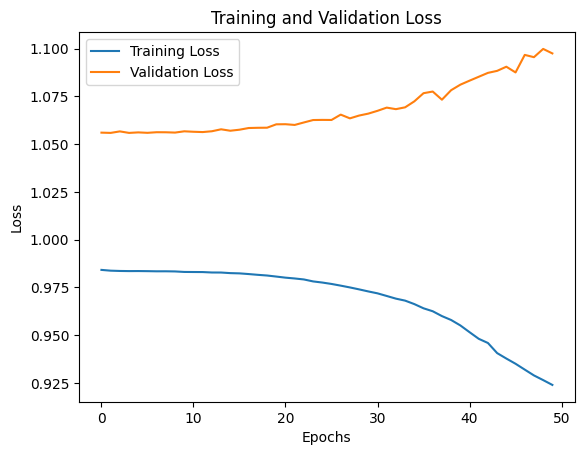

In [16]:
import matplotlib.pyplot as plt

loss = model.evaluate(X_test_rnn, y_test_rnn)
print('The loss in testing set:', loss)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:

y_val_pred_rnn = model.predict(X_val_rnn)
y_test_pred_rnn = model.predict(X_test_rnn)

# RMSE
rmse_rnn = np.sqrt(mean_squared_error(y_test_rnn[:, 0], y_test_pred_rnn[:, 0]))

# MSE
mse_rnn = mean_squared_error(y_test_rnn[:, 0], y_test_pred_rnn[:, 0])

# MAE
mae_rnn = mean_absolute_error(y_test_rnn[:, 0], y_test_pred_rnn[:, 0])

# R²
r2_rnn = r2_score(y_test_rnn[:, 0], y_test_pred_rnn[:, 0])

print(f"RMSE of 'max_temp' in test set: {rmse_rnn}")

print(f"MSE of 'max_temp' in test set: {mse_rnn}")

print(f"MAE of 'max_temp' in test set: {mae_rnn}")

print(f"R² of 'max_temp' in test set: {r2_rnn}")

1097/1097 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step
RMSE of 'max_temp' in test set: 1.0260319574598435
MSE of 'max_temp' in test set: 1.052741577728878
MAE of 'max_temp' in test set: 0.662036880341656
R² of 'max_temp' in test set: -0.039245555446874913


In [18]:
# Permutation Feature Importance
from sklearn.inspection import permutation_importance

X_test_rnn_reshaped = X_test_rnn.reshape(X_test_rnn.shape[0], -1)

def custom_scoring(estimator, X, y):
    X_reshaped = X.reshape(-1, time_steps, len(features))
    y_pred = estimator.predict(X_reshaped)
    return -np.mean((y_pred - y) ** 2)


result_rnn = permutation_importance(estimator=model, X=X_test_rnn_reshaped, y=y_test_rnn, n_repeats=10, random_state=42, scoring=custom_scoring, n_jobs=-1)
for i in range(len(features)):
    print(f"Feature: {features[i]}, Importance: {result_rnn.importances_mean[i]}")

1097/1097 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step
Feature: global_radiation, Importance: -0.0009821050771102514
Feature: max_temp, Importance: 0.004798769779830292
Feature: mean_temp, Importance: 0.008655674404808167
Feature: min_temp, Importance: 0.0030254968340603485
Feature: season, Importance: 0.008345191177486111
